GNNs have been applied in a variety of areas, including the following:
- Text Classification
- Recommendation Systems
- Traffic Forecasting

By using networkX, library we are in a position to understand and interpret Graph data.

In [1]:
import numpy as np

In [2]:
import networkx as nx

In [3]:
Graph = nx.Graph()
blue, orange, green = '#1f77b4', '#ff7f0e', '#2ca02c'

In [4]:
Graph.add_nodes_from(
    [
        (1,{"color": blue}),
        (2,{"color": orange}),
        (3,{"color": blue}),
        (4,{"color": green}),
    ]
)

In [5]:
Graph.add_edges_from([(1,2), (2,3), (1,3), (3,4)])

In [6]:
import numpy as np
A = np.asarray(nx.adjacency_matrix(Graph).todense())

In [7]:
A

array([[0, 1, 1, 0],
       [1, 0, 1, 0],
       [1, 1, 0, 1],
       [0, 0, 1, 0]], dtype=int32)

In [8]:
def build_graph_color_label_repr(G : nx.Graph, mapping_dict):
    """
    Build a graph color label representation from a networkx graph
    """
    one_hot_indices = np.array([mapping_dict[vertex] for vertex in nx.get_node_attributes(Graph, 'color').values()])
    
    one_hot_encoding = np.zeros((one_hot_indices.size, len(mapping_dict)))
    
    one_hot_encoding[np.arange(one_hot_indices.size), one_hot_indices] = 1
    
    return one_hot_encoding

X = build_graph_color_label_repr(Graph, {green: 0, blue: 1, orange: 2})

In [9]:
X

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

dict_values(['#1f77b4', '#ff7f0e', '#1f77b4', '#2ca02c'])


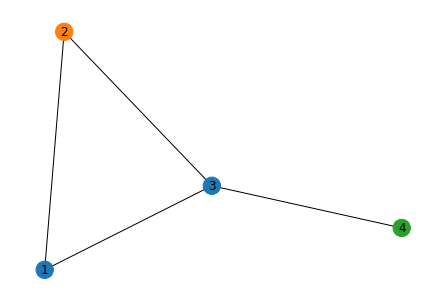

In [10]:
color_map = nx.get_node_attributes(Graph, 'color').values()
print(color_map)
nx.draw(Graph, with_labels=True,node_color=color_map)

In [11]:
X

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [12]:
f_in, f_out = X.shape[1], 6
W_1 = np.random.rand(f_in, f_out)

In [13]:
W_2 = np.random.rand(f_in, f_out)

In [14]:
X

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [15]:
W_1

array([[0.70836023, 0.52824654, 0.39848026, 0.3694697 , 0.66714223,
        0.30688213],
       [0.72603163, 0.49789556, 0.88437196, 0.07101018, 0.28421969,
        0.223869  ],
       [0.85503266, 0.45123835, 0.34075288, 0.94658667, 0.1946177 ,
        0.3898614 ]])

In [16]:
W_2

array([[0.90122816, 0.71546546, 0.22337609, 0.93808219, 0.81810166,
        0.49128494],
       [0.30707397, 0.22082489, 0.20728336, 0.20323248, 0.95853674,
        0.41444067],
       [0.60607963, 0.09679573, 0.52138904, 0.94077487, 0.31309976,
        0.40758943]])

In [18]:
h = np.dot(X, W_1) + np.dot(A,X).dot(W_2)

In [19]:
h

array([[1.63918523, 0.81551617, 1.61304435, 1.21501753, 1.55585618,
        1.0458991 ],
       [1.46918061, 0.89288812, 0.7553196 , 1.35305164, 2.11169117,
        1.21874275],
       [2.54041339, 1.53098163, 1.83642044, 2.15309972, 2.37395784,
        1.53718404],
       [1.0154342 , 0.74907143, 0.60576362, 0.57270219, 1.62567897,
        0.7213228 ]])

Ultimately, we want a graph convolutional layer to update the representation of the node information
encoded in X by utilizing the structural (connectivity) information provided by A. There are many potential ways to do this, and this plays out in the numerous kinds of graph convolutions that have been developed.